# **İris veri seti üzerinden kümeleme işlemi.**

İris veri kümesinin sadece ilk iki kolonu (Sepal Length ve Sepal Width) kullanılmıştır.

In [8]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [111]:
dataset = load_iris()
data = dataset.data[:,:2]
target = dataset.target

# **K-Means**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

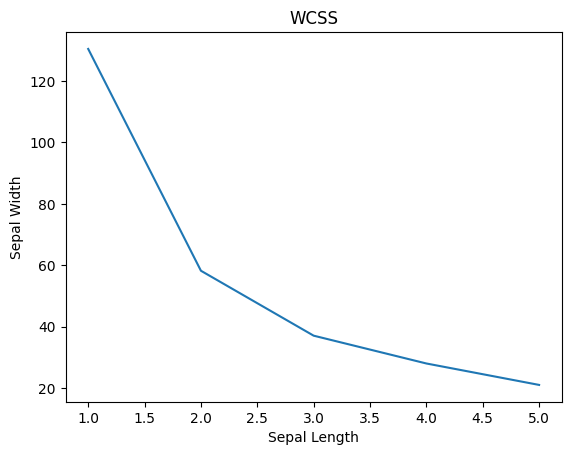

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster_centers
 [[5.77358491 2.69245283]
 [5.006      3.428     ]
 [6.81276596 3.07446809]]

Y_pred
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 2 2 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]



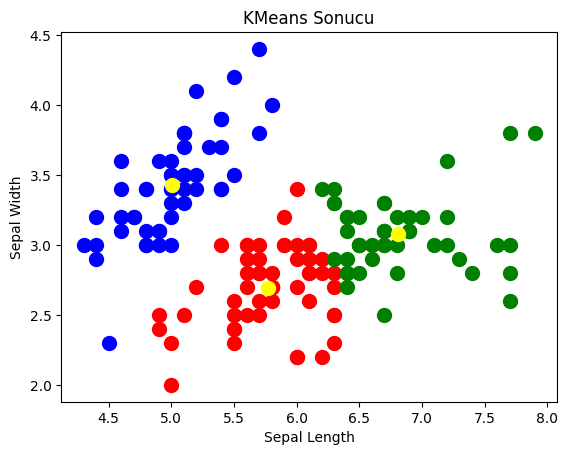

In [86]:
from sklearn.cluster import KMeans

#Uygun olabilecek k değerini belirlemeye çalışıyoruz
results = []
for i in range(1,6):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
  kmeans.fit(data)
  results.append(kmeans.inertia_)

plt.plot(range(1,6), results)
plt.title('WCSS')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
Y_pred_kmeans = kmeans.fit_predict(data)
cluster_centers = kmeans.cluster_centers_

print('cluster_centers\n {0}\n'.format(cluster_centers))
print('Y_pred\n {0}\n'.format(Y_pred_kmeans))

plt.scatter(data[Y_pred_kmeans == 0,0], data[Y_pred_kmeans == 0,1], s=100, c='red')
plt.scatter(data[Y_pred_kmeans == 1,0], data[Y_pred_kmeans == 1,1], s=100, c='blue')
plt.scatter(data[Y_pred_kmeans == 2,0], data[Y_pred_kmeans == 2,1], s=100, c='green')

#Kümelerin merkez noktaları
plt.scatter(cluster_centers[0,0], cluster_centers[0,1], s=100, c='yellow')
plt.scatter(cluster_centers[1,0], cluster_centers[1,1], s=100, c='yellow')
plt.scatter(cluster_centers[2,0], cluster_centers[2,1], s=100, c='yellow')

plt.title('KMeans Sonucu')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.show()

print()

# **Hiyerarşik**

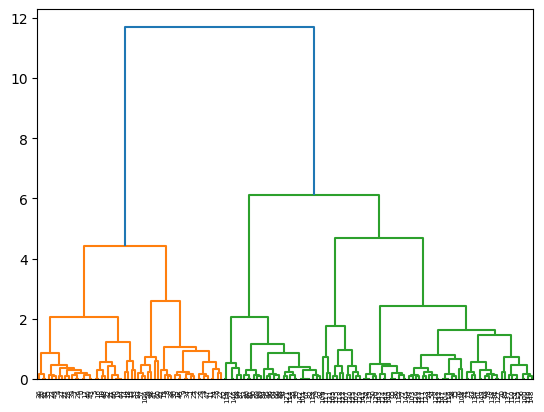

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Y_pred
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 1 0 1 1 0 2 0 2 0 2 2 2 2 0 0 2 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 2 2 2 2 0 2 1 2 2 2 0 1 2 0 2 0 0 0 0 1 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0
 0 0]



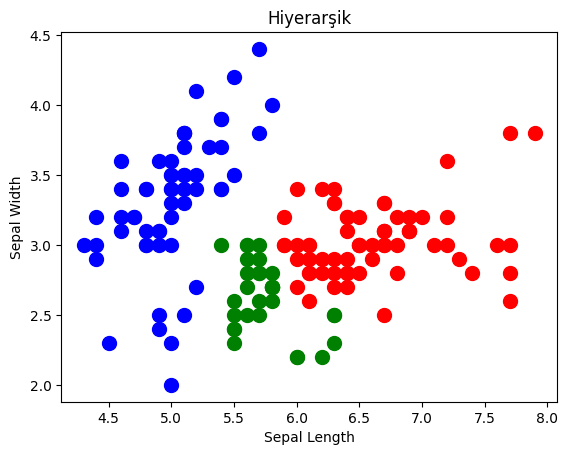

In [87]:
#Kaç küme olacağını bulmaya çalışıyoruz
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data, method='ward'))
plt.show()

from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
Y_pred_hiyerarsik = ac.fit_predict(data)
print('Y_pred\n {0}\n'.format(Y_pred_hiyerarsik))

plt.scatter(data[Y_pred_hiyerarsik == 0,0], data[Y_pred_hiyerarsik == 0,1], s=100, c='red')
plt.scatter(data[Y_pred_hiyerarsik == 1,0], data[Y_pred_hiyerarsik == 1,1], s=100, c='blue')
plt.scatter(data[Y_pred_hiyerarsik == 2,0], data[Y_pred_hiyerarsik == 2,1], s=100, c='green')
plt.title('Hiyerarşik')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.show()


# **Karşılaştırma**

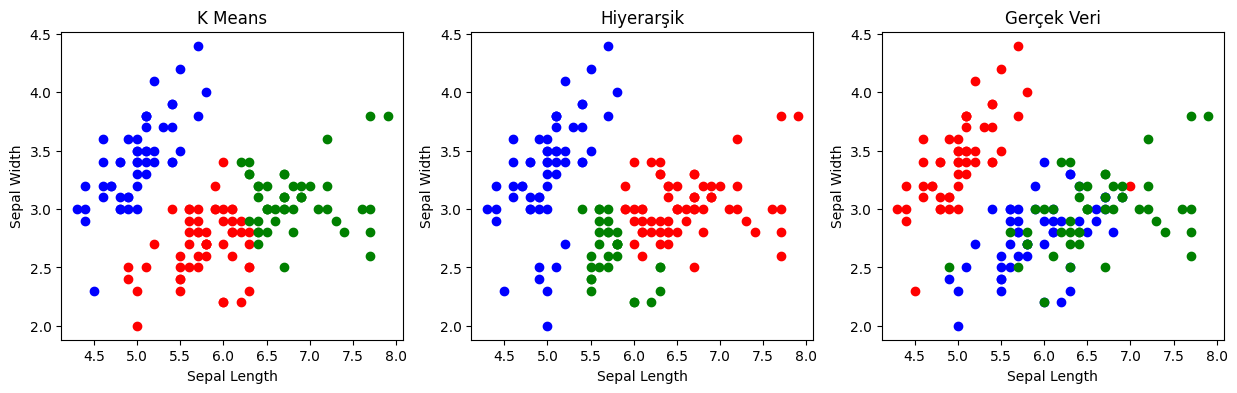

In [117]:
import numpy as np

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, gridspec_kw={'wspace': 0.2}, figsize=(15, 4))

ax1.set_title('K Means')
ax1.scatter(data[Y_pred_kmeans == 0,0], data[Y_pred_kmeans == 0,1], c='red')
ax1.scatter(data[Y_pred_kmeans == 1,0], data[Y_pred_kmeans == 1,1], c='blue')
ax1.scatter(data[Y_pred_kmeans == 2,0], data[Y_pred_kmeans == 2,1], c='green')
ax1.set_xlabel('Sepal Length')
ax1.set_ylabel('Sepal Width')

ax2.set_title('Hiyerarşik')
ax2.scatter(data[Y_pred_hiyerarsik == 0,0], data[Y_pred_hiyerarsik == 0,1], c='red')
ax2.scatter(data[Y_pred_hiyerarsik == 1,0], data[Y_pred_hiyerarsik == 1,1], c='blue')
ax2.scatter(data[Y_pred_hiyerarsik == 2,0], data[Y_pred_hiyerarsik == 2,1], c='green')
ax2.set_xlabel('Sepal Length')
ax2.set_ylabel('Sepal Width')

ax3.set_title('Gerçek Veri')
for i in range(len(target)):
  if i <= 50:
    ax3.scatter(data[i,0], data[i,1], c='red')
  elif i > 50 and i <= 100:
    ax3.scatter(data[i,0], data[i,1], c='blue')
  else:
    ax3.scatter(data[i,0], data[i,1], c='green')
ax3.set_xlabel('Sepal Length')
ax3.set_ylabel('Sepal Width')

plt.show()